In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from IPython.display import Image
import scipy.io as spio
import scipy.signal as signal

# Projeto 2 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identifica√ß√£o
## Nome: Gustavo Almeida Valentim
## Matr√≠cula: 202014468

# Quest√£o 1

Um sistema de aquisi√ß√£o de dados de eletrocardiograma foi ligado de forma equivocada perto demais da rede el√©trica. Assim, a interfer√™ncia da rede el√©trica (a 60 Hz) aparece de forma marcante no sinal adquirido. O seu objetivo √© projetar um filtro digital para eliminar totalmente o ru√≠do em 60Hz. A frequ√™ncia de amostragem do sistema √©: 

$$ f_a = 500~Hz $$ 

Siga as quest√µes abaixo.

## Quest√£o 1a (0.5  pontos)

Projete o filtro em quest√£o utilizando a coloca√ß√£o de p√≥los e zeros no plano z. Desenhe o diagrama de p√≥los e zeros do filtro projetado, indicando quais p√≥los e zeros foram indicados e o porqu√™ destes p√≥los/zeros terem sido escolhidos. Voc√™ pode inserir o seu projeto como uma imagem escaneada abaixo.

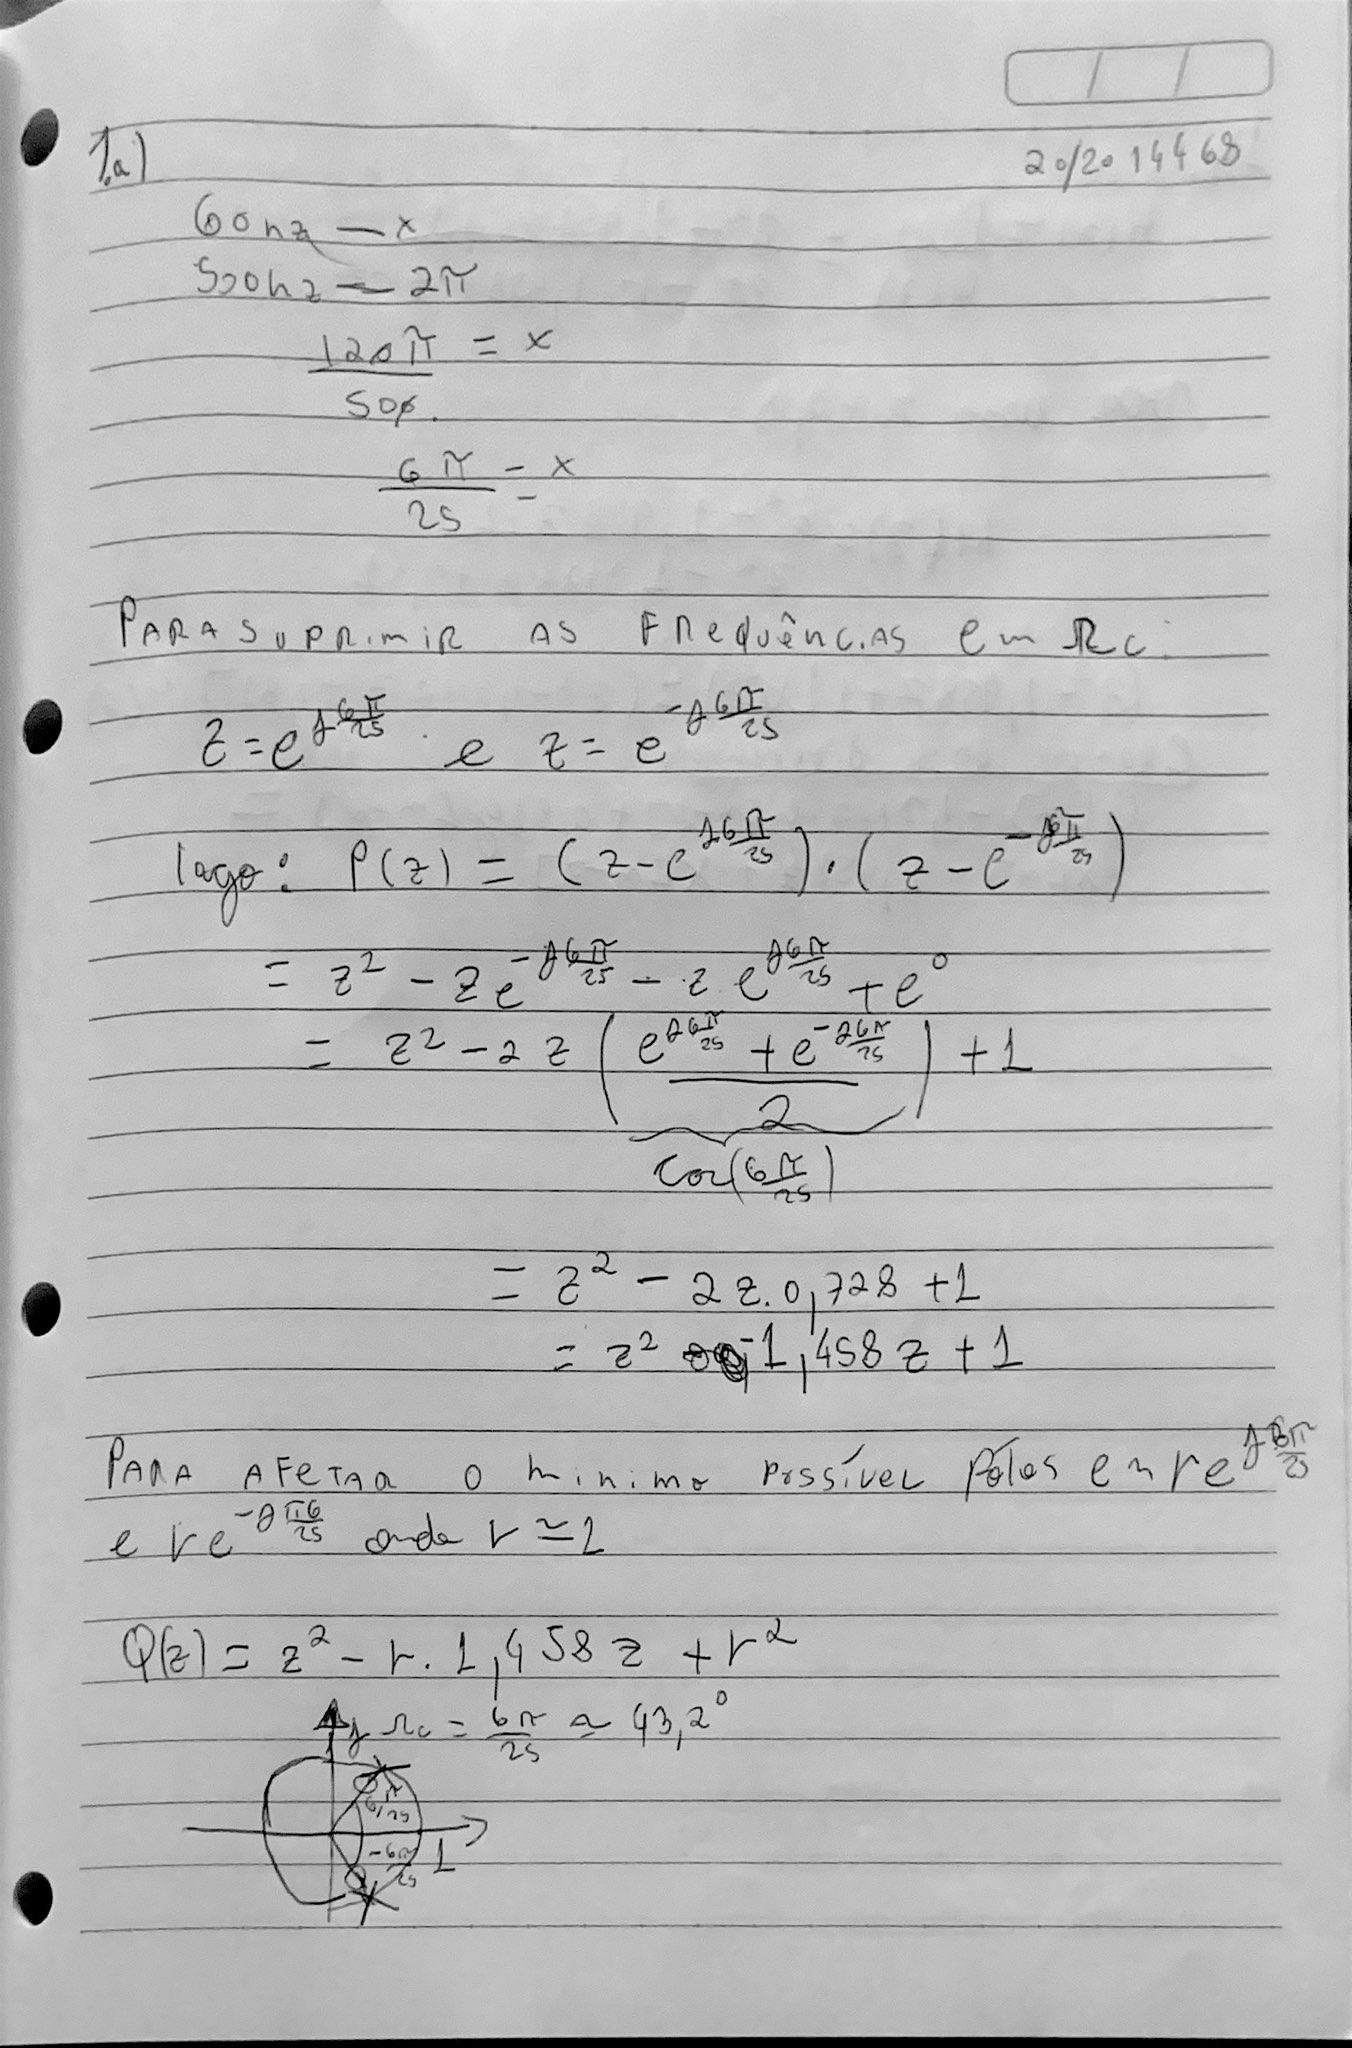

In [2]:
#Resposta da quest√£o 1a
Image(filename='1A.jpg')

## Quest√£o 1b (0.5 pontos)

A partir do diagrama desenvolvido na quest√£o anterior, escreva a fun√ß√£o de transfer√™ncia do filtro H(z) e a equa√ß√£o de diferen√ßas do sistema que realiza o filtro. Voc√™ pode inserir sua resposta como uma imagem escaneada abaixo.

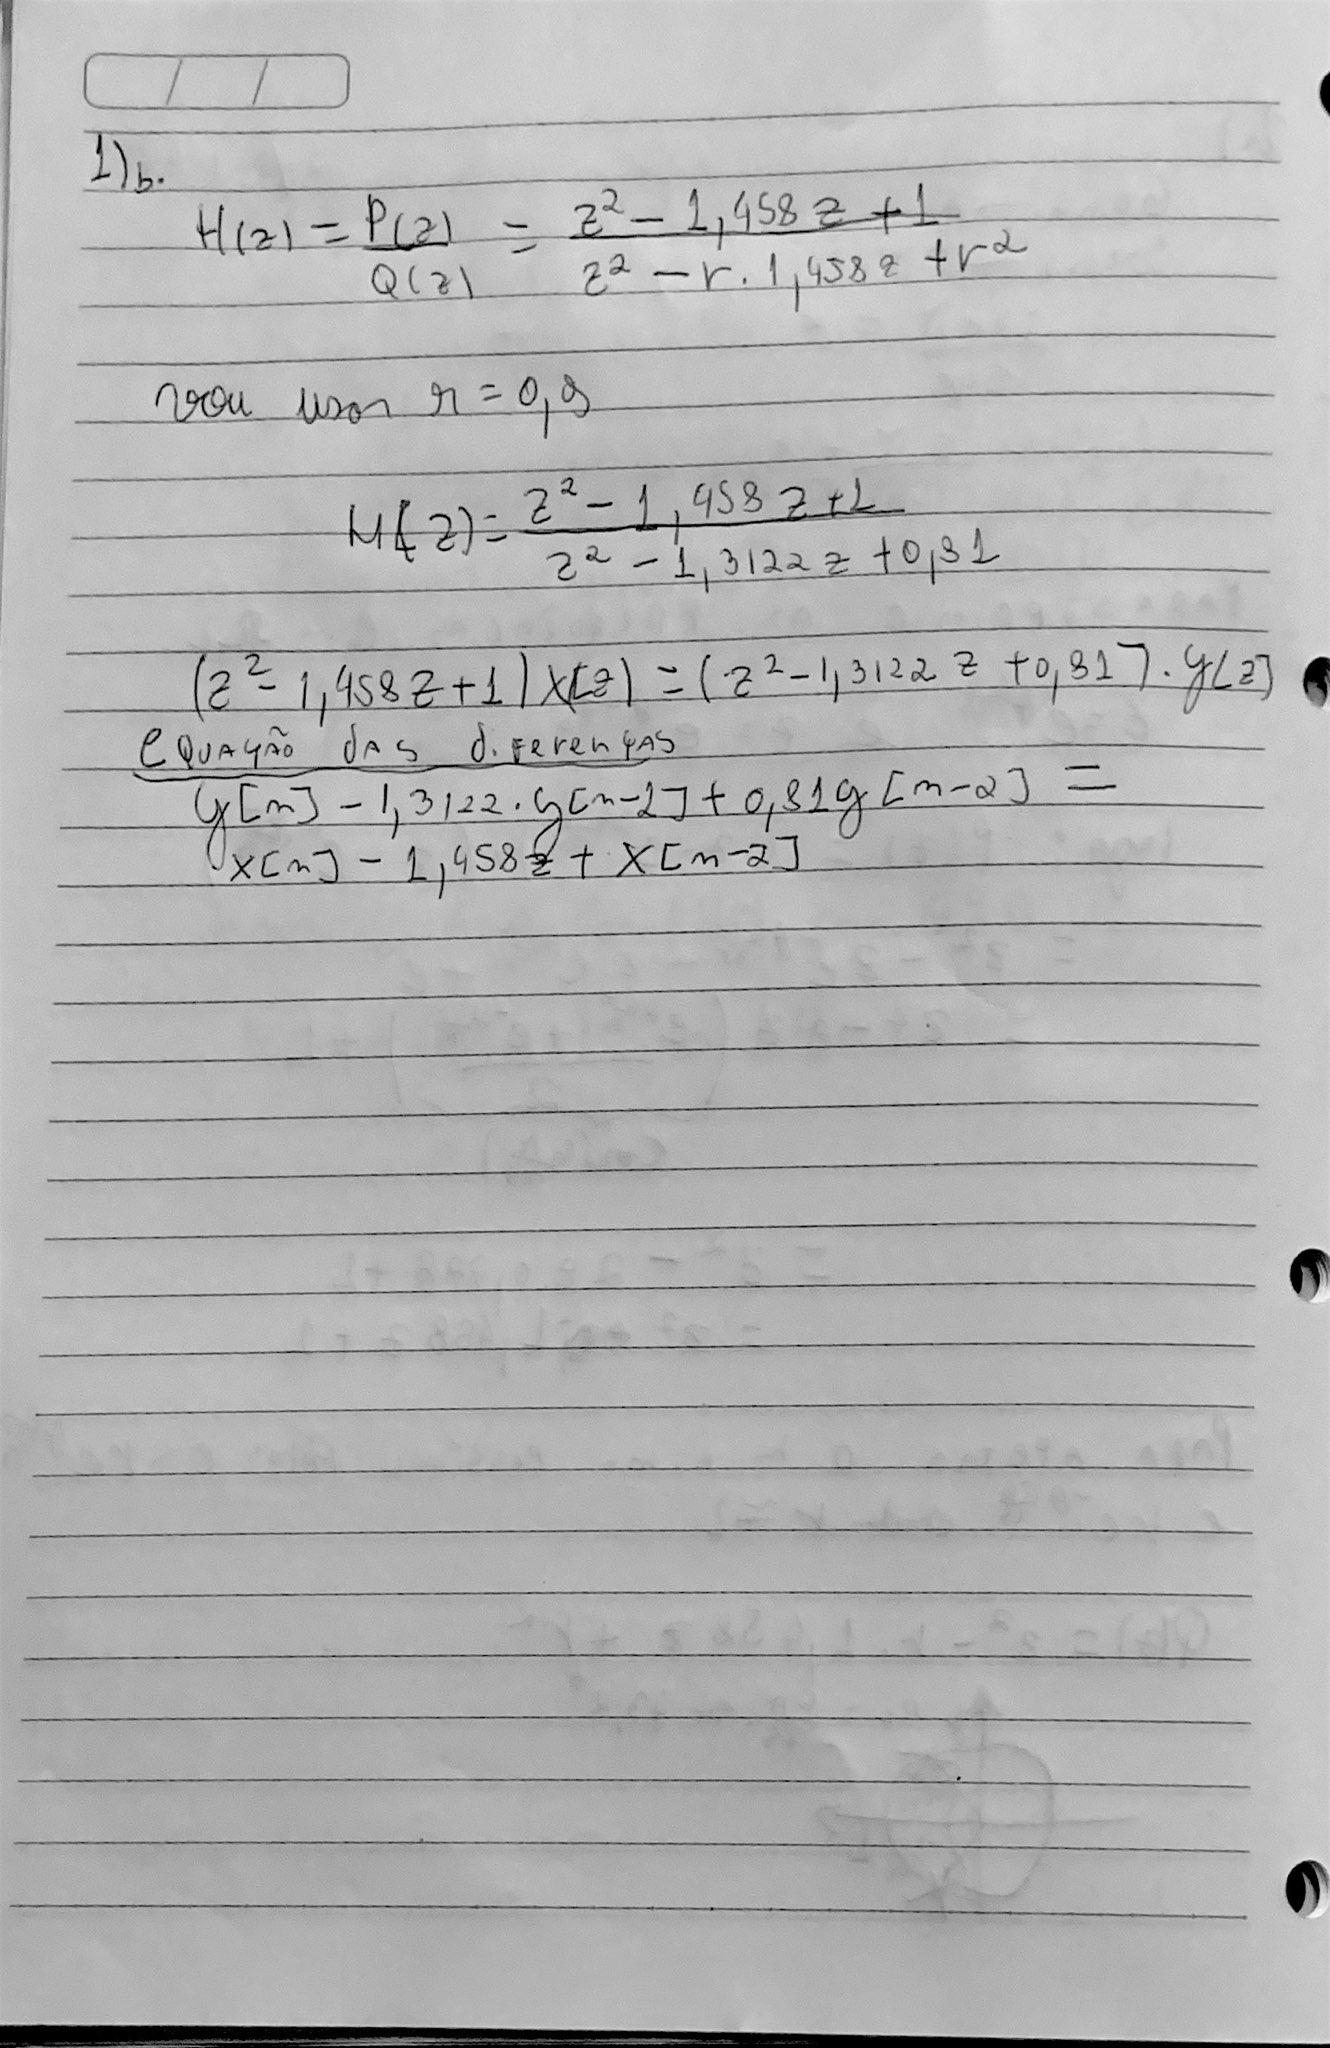

In [3]:

Image(filename='1B.jpg')

## Quest√£o 1c (1  ponto)

Plote a **resposta em frequ√™ncia** do filtro projetado (magnitude e fase). 

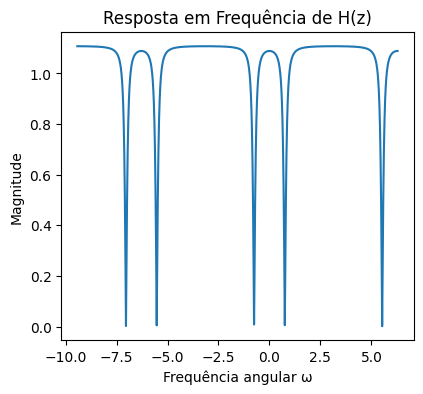

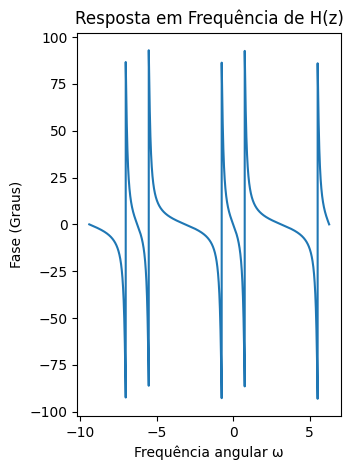

In [4]:
#Resposta da quest√£o 1c
b0 = 1
b1 = -1.458
b2 = 1
a0 = 1
a1 = -1.3122
a2 = 0.81

w = np.linspace(-3 *np.pi, 2 * np.pi, 10000)
z = np.exp(1j * w)

H = (b0 * (z**2) + b1 * z + b2) / (a0 * (z**2) + a1 * z + a2)
H_abs = abs(H)
H_phase_deg = np.angle(H, deg=True)

plt.figure(figsize=(10, 4))
# em magnitude
plt.subplot(1, 2, 1)
plt.plot(w, H_abs)
plt.title('Resposta em Frequ√™ncia de H(z)')
plt.xlabel('Frequ√™ncia angular œâ')
plt.ylabel('Magnitude')
plt.show()
# em fase
plt.subplot(1, 2, 2)
plt.plot(w, H_phase_deg)
plt.title('Resposta em Frequ√™ncia de H(z)')
plt.xlabel('Frequ√™ncia angular œâ')
plt.ylabel('Fase (Graus)')

plt.tight_layout()
plt.show()



## Quest√£o 1d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal ap√≥s a filtragem (y[n]).

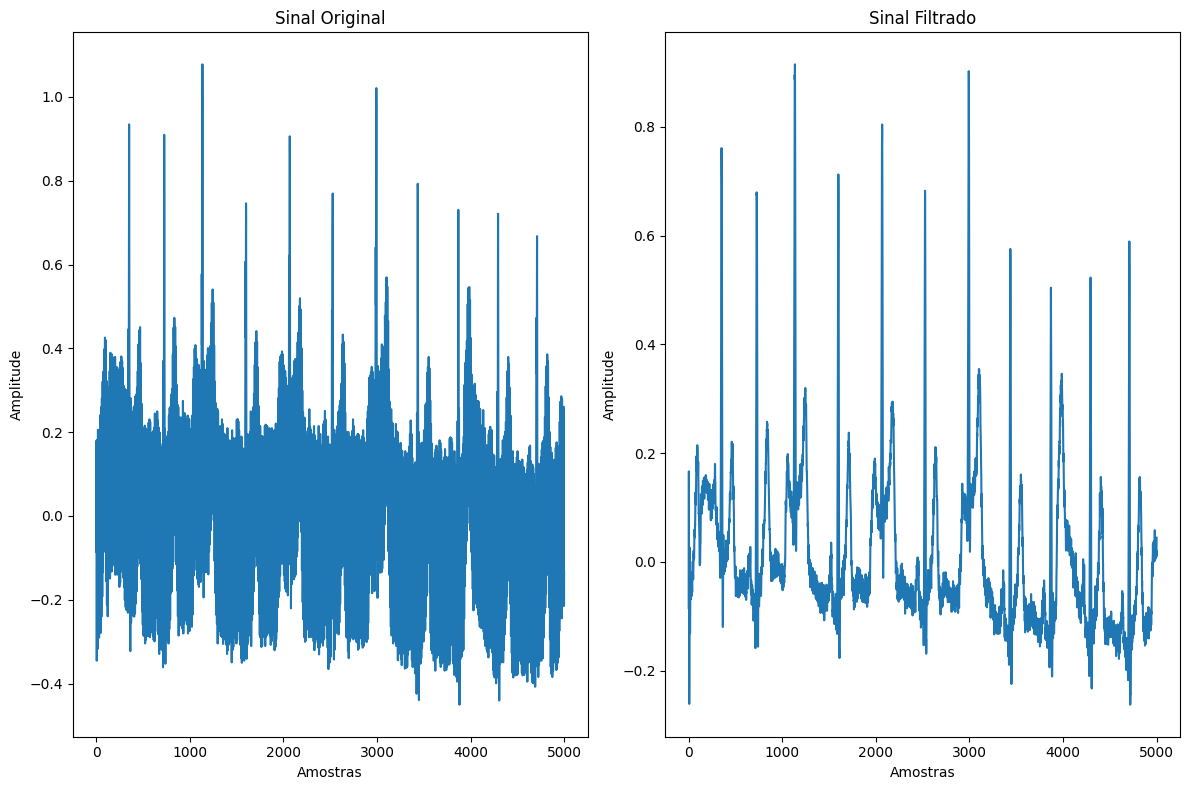

In [5]:
# Carregar o sinal de ECG
data = spio.loadmat('noisy_ecg_data.mat')
sinal = data['noisy_ecg'].ravel()

# Coeficientes do filtro
b0 = 1
b1 = -1.458
b2 = 1
a0 = 1
a1 = -1.3122
a2 = 0.81

# Aplicar o filtro ao sinal
filtered_signal = np.zeros_like(sinal)

for n in range(len(sinal)):
    if n >= 2:
        filtered_signal[n] = b0*sinal[n] + b1*sinal[n-1] + b2*sinal[n-2] - a1*filtered_signal[n-1] - a2*filtered_signal[n-2]
    elif n == 1:
        filtered_signal[n] = b0*sinal[n] + b1*sinal[n-1] - a1*filtered_signal[n-1]
    else:
        filtered_signal[n] = b0*sinal[n]

# Plotar o sinal original e o sinal filtrado
plt.figure(figsize=(12, 8))

# Sinal original
plt.subplot(1, 2, 1)
plt.plot(sinal)
plt.title('Sinal Original')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

# Sinal filtrado
plt.subplot(1, 2, 2)
plt.plot(filtered_signal)
plt.title('Sinal Filtrado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Quest√£o 2

Ainda no sistema de aquisi√ß√£o de dados de eletrocardiograma, mais tarde foi verificado que, mesmo depois de resolvido o problema da interfer√™ncia da rede el√©trica (i.e., o sinal n√£o tem um ru√≠do espec√≠fico em 60Hz), o sinal adquirido tinha bastante ru√≠do de alta frequ√™ncia (acima de 35Hz). O objetivo desta quest√£o √© projetar um filtro digital para atenuar as frequ√™ncias acima de 35Hz. A frequ√™encia de amostragem do sistema √©:

$$ f_a = 500~Hz $$

Siga as quest√µes abaixo.

## Quest√£o 2a (0.5  pontos)

Projete o filtro em quest√£o utilizando a coloca√ß√£o de p√≥los e zeros no plano z. Desenhe o diagrama de p√≥los e zeros do filtro projetado, indicando quais p√≥los e zeros foram indicados e o porqu√™ destes p√≥los/zeros terem sido escolhidos. Voc√™ pode inserir o seu projeto como uma imagem escaneada abaixo.

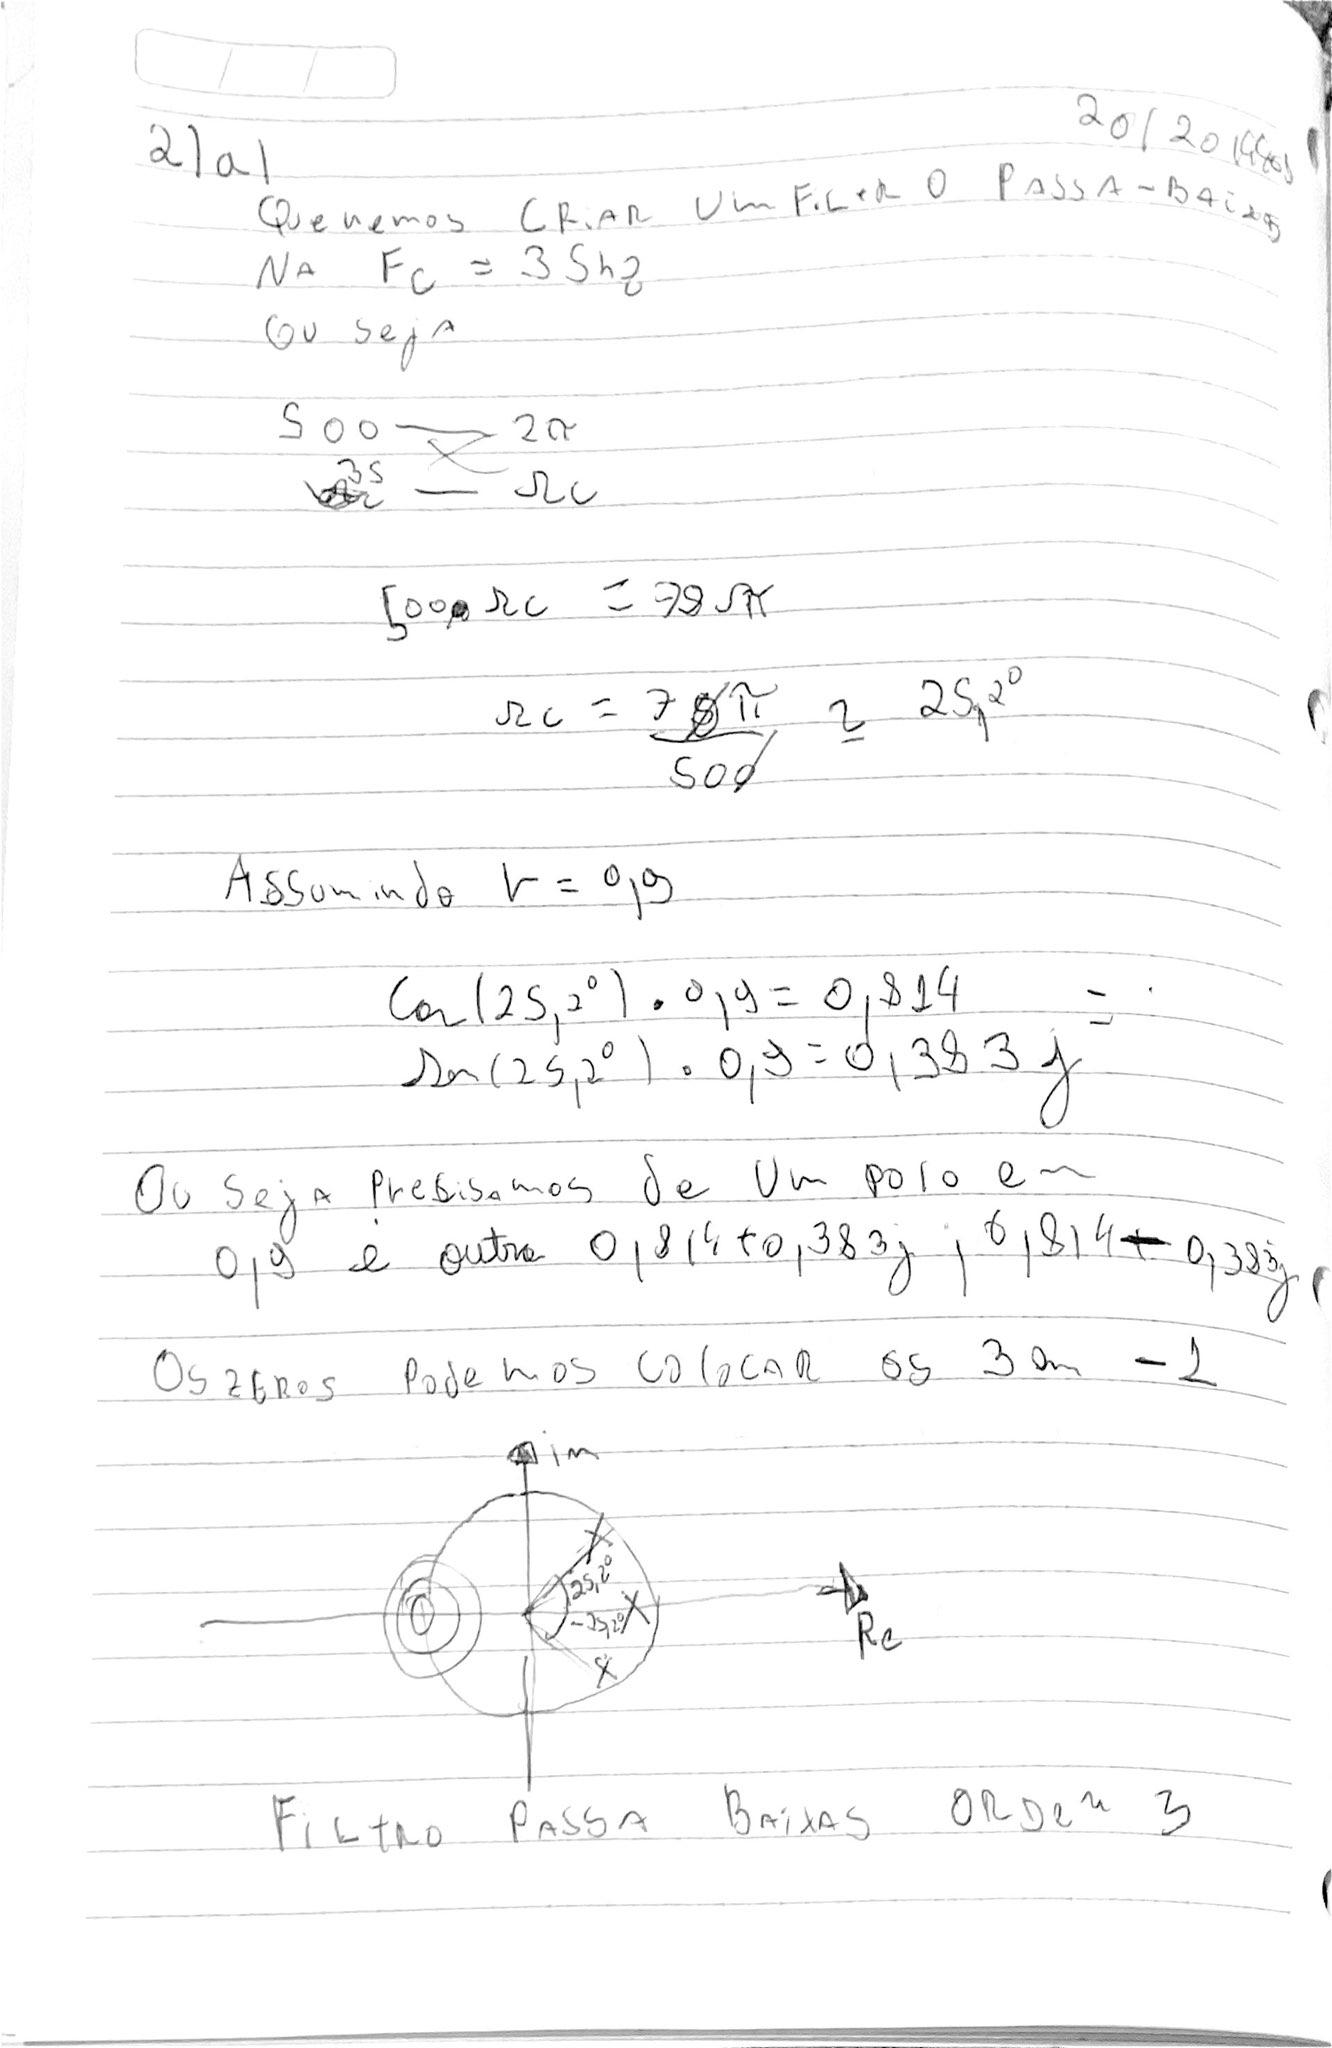

In [6]:
#Resposta da quest√£o 2a
Image(filename='2P2A.jpg')

## Quest√£o 2b (0.5 pontos)

A partir do diagrama desenvolvido na quest√£o anterior, escreva a fun√ß√£o de transfer√™ncia do filtro H(z) e a equa√ß√£o de diferen√ßas do sistema que realiza o filtro. Voc√™ pode inserir sua resposta como uma imagem escaneada abaixo.

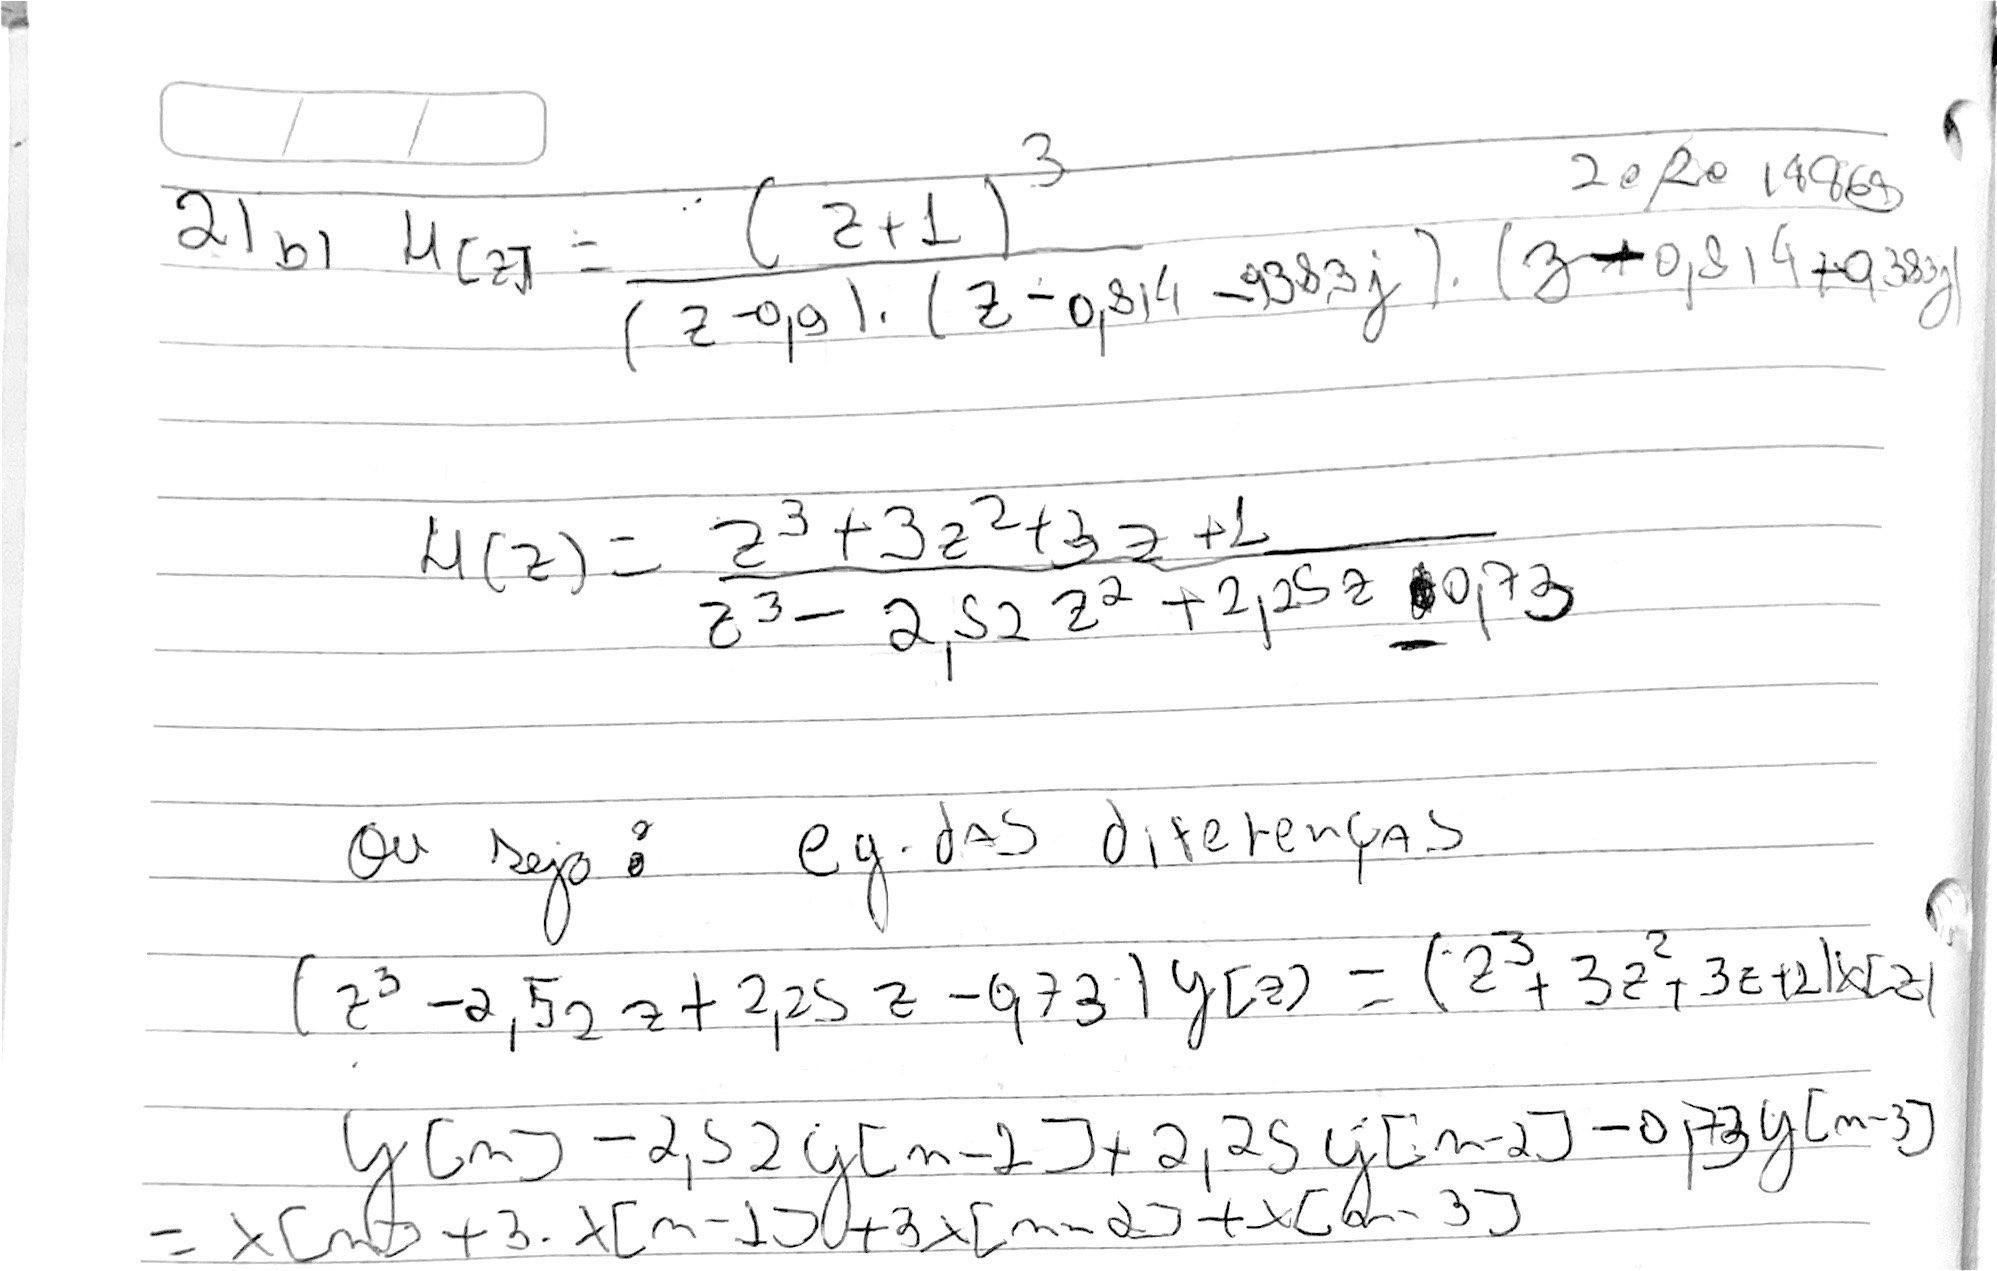

In [7]:
#Resposta da quest√£o 2a
Image(filename='2P2B.jpg')

## Quest√£o 2c (1  ponto)

Plote a **resposta em frequ√™ncia** do filtro projetado (magnitude e fase). 

Para realizar a resposta em frequ√™ncia do filtro eu decidi fazer o c√≥digo calculando e exibindo a resposta em frequ√™ncia de um filtro passa-baixa projetado utilizando a t√©cnica da janela de Hamming. A resposta em frequ√™ncia √© mostrada por meio da magnitude e da fase do filtro projetado. Isso permite visualizar como o filtro atenua as frequ√™ncias acima da frequ√™ncia de corte 35hz e preserva as frequ√™ncias abaixo dela.

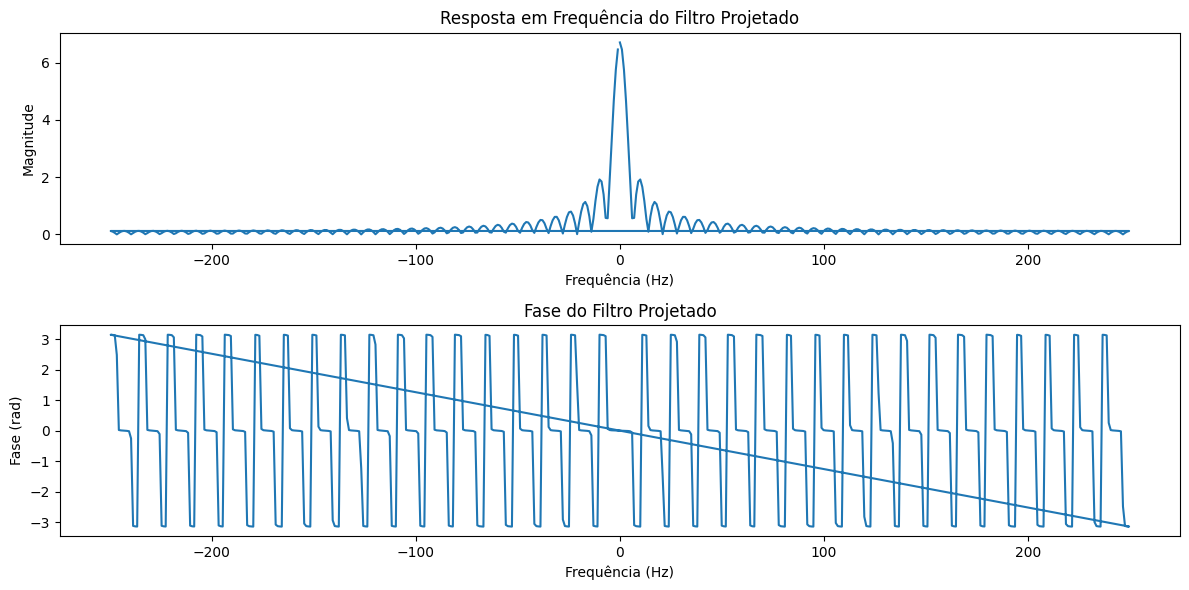

In [14]:
# Frequ√™ncia de amostragem
fs = 500

# Frequ√™ncia de corte
fc = 35

# N√∫mero de pontos do filtro
num_points = 501

# C√°lculo do atraso do filtro
delay = (num_points - 1) // 2

# Cria√ß√£o da janela de Hamming
window = np.hamming(num_points)

# Cria√ß√£o do vetor de frequ√™ncias
freq = np.fft.fftfreq(num_points, d=1/fs)

# Filtro ideal no dom√≠nio da frequ√™ncia
ideal_filter = np.where(np.abs(freq) <= fc, 1, 0)

# Filtro projetado (multiplica√ß√£o da janela pela resposta ideal)
filter_response = ideal_filter * window

# Transformada de Fourier inversa para obter a resposta ao impulso do filtro
impulse_response = np.fft.ifft(filter_response)

# C√°lculo da resposta em frequ√™ncia (magnitude e fase)
frequency_response = np.fft.fft(filter_response)

# Plot da resposta em frequ√™ncia do filtro projetado (magnitude e fase)
plt.figure(figsize=(12, 6))

# Magnitude
plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(frequency_response))
plt.title('Resposta em Frequ√™ncia do Filtro Projetado')
plt.xlabel('Frequ√™ncia (Hz)')
plt.ylabel('Magnitude')

# Fase
plt.subplot(2, 1, 2)
plt.plot(freq, np.angle(frequency_response))
plt.title('Fase do Filtro Projetado')
plt.xlabel('Frequ√™ncia (Hz)')
plt.ylabel('Fase (rad)')

plt.tight_layout()
plt.show()

## Quest√£o 2d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data_2.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal ap√≥s a filtragem (y[n]).

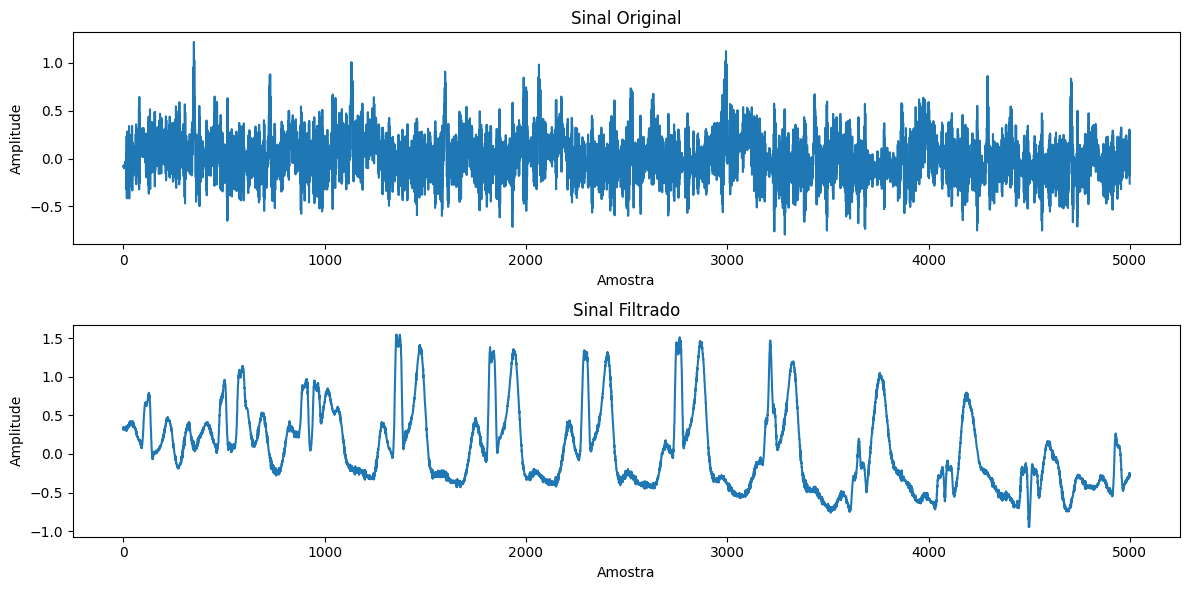

In [9]:
# Carregar o sinal do arquivo .mat
data = spio.loadmat('noisy_ecg_data_2.mat', squeeze_me=True)
sinal = data['noisy_ecg2']

# Frequ√™ncia de amostragem
fs = 500

# Frequ√™ncia de corte
fc = 35

# N√∫mero de pontos do filtro
num_points = 501

# C√°lculo do atraso do filtro
delay = (num_points - 1) // 2

# Cria√ß√£o da janela de Hamming
window = np.hamming(num_points)

# Cria√ß√£o do vetor de frequ√™ncias
freq = np.fft.fftfreq(num_points, d=1/fs)

# Filtro ideal no dom√≠nio da frequ√™ncia
ideal_filter = np.where(np.abs(freq) <= fc, 1, 0)

# Filtro projetado (multiplica√ß√£o da janela pela resposta ideal)
filter_response = ideal_filter * window

# Aplica√ß√£o do filtro no sinal
filtered_signal = np.convolve(sinal, filter_response, mode='same')

# Plot do sinal antes e depois da filtragem
plt.figure(figsize=(12, 6))

# Sinal original
plt.subplot(2, 1, 1)
plt.plot(sinal)
plt.title('Sinal Original')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')

# Sinal filtrado
plt.subplot(2, 1, 2)
plt.plot(filtered_signal)
plt.title('Sinal Filtrado')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Quest√£o 3

Considere o filtro anal√≥gico:

$$ H_a \left(s\right) = \frac{\omega_c}{\omega_c + s}$$

E considere o valor:

$$\omega_c = 10^3 $$

## Quest√£o 3a (1  ponto)

Projete uma aproxima√ß√£o digital para este filtro com crit√©rio de 10%. Indique a taxa de amostragem calculada para esta aproxima√ß√£o (T1) e compare a resposta em frequ√™ncia do filtro projetado H1() com a resposta em frequ√™ncia do filtro anal√≥gic Ha(). Plote as frequ√™ncias at√© ao menos:

$$ \omega = 10^5 \pi $$

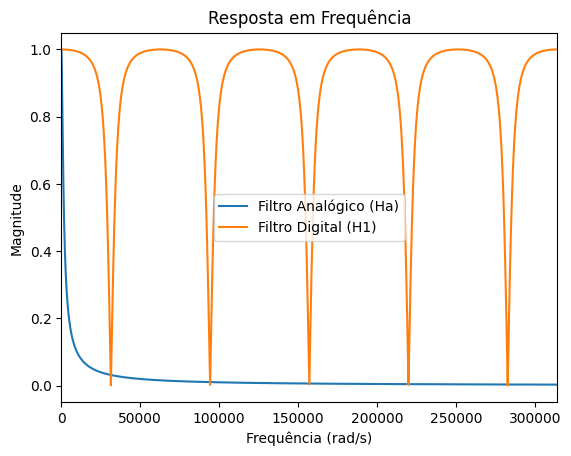

Taxa de amostragem T1: 0.01


In [10]:
# Frequ√™ncia de corte do filtro anal√≥gico
wc = 1e3

# Crit√©rio de aproxima√ß√£o (10%)
eps = 0.1

# Taxa de amostragem para a aproxima√ß√£o digital
T1 = 1 / (wc * eps)

# Frequ√™ncias para o plot
w = np.linspace(0,1e5 * np.pi, 10000)

# Resposta em frequ√™ncia do filtro anal√≥gico
Ha = 1 / (1 + 1j * w / wc)

# Filtro digital
b, a = signal.bilinear([1], [1 / wc, 1], fs=1 / T1)

# Resposta em frequ√™ncia do filtro digital
w_d, H1 = signal.freqz(b, a, worN=w)

# Plot das respostas em frequ√™ncia
plt.plot(w, abs(Ha), label='Filtro Anal√≥gico (Ha)')
plt.plot(w, abs(H1), label='Filtro Digital (H1)')
plt.title('Resposta em Frequ√™ncia')
plt.xlabel('Frequ√™ncia (rad/s)')
plt.ylabel('Magnitude')
plt.xlim(0, 1e5 * np.pi)  # Limitando o eixo x at√© ùúî = 10^5 * pi
#plt.xlim(0, 58000)  # Limitando o eixo x at√© ùúî = 10^5 * pi

plt.legend()
plt.show()

# Print da taxa de amostragem T1
print('Taxa de amostragem T1:', T1)

## Quest√£o 3b (1  ponto)

Projete uma aproxima√ß√£o digital para este filtro com crit√©rio de 1%. Indique a taxa de amostragem calculada para esta aproxima√ß√£o (T2) e compare a resposta em frequ√™ncia do filtro projetado H2() com a resposta em frequ√™ncia do filtro anal√≥gic Ha(). Plote as frequ√™ncias at√© ao menos:

$$ \omega = 10^5 \pi $$

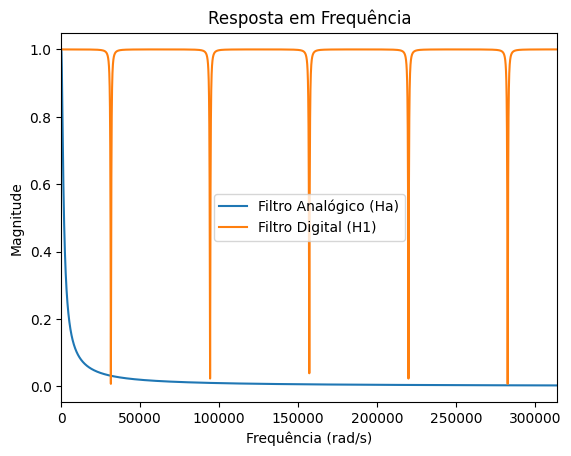

Taxa de amostragem T2: 0.1


In [11]:
# Frequ√™ncia de corte do filtro anal√≥gico
wc = 1e3

# Crit√©rio de aproxima√ß√£o (1%)
eps = 0.01

# Taxa de amostragem para a aproxima√ß√£o digital
T2 = 1 / (wc * eps)

# Frequ√™ncias para o plot
w = np.linspace(0, 1e5 * np.pi, 10000)

# Resposta em frequ√™ncia do filtro anal√≥gico
Ha = 1 / (1 + 1j * w / wc)

# Filtro digital
b, a = signal.bilinear([1], [1 / wc, 1], fs=1 / T2)

# Resposta em frequ√™ncia do filtro digital
w_d, H1 = signal.freqz(b, a, worN=w)

# Plot das respostas em frequ√™ncia
plt.plot(w, abs(Ha), label='Filtro Anal√≥gico (Ha)')
plt.plot(w, abs(H1), label='Filtro Digital (H1)')
plt.title('Resposta em Frequ√™ncia')
plt.xlabel('Frequ√™ncia (rad/s)')
plt.ylabel('Magnitude')
plt.xlim(0, 1e5 * np.pi)  # Limitando o eixo x at√© ùúî = 10^5 * pi
plt.legend()
plt.show()

# Print da taxa de amostragem T1
print('Taxa de amostragem T2:', T2)

## Quest√£o 3c (1 ponto)

Calcule a resposta ao impulso ha(t) do filtro anal√≥gico Ha(s), bem como as respostas ao impulso h1[n] e h2[n] dos filtros projetados H1(z) e H2(z). **Plote** as respostas ao impulso na mesma escala.

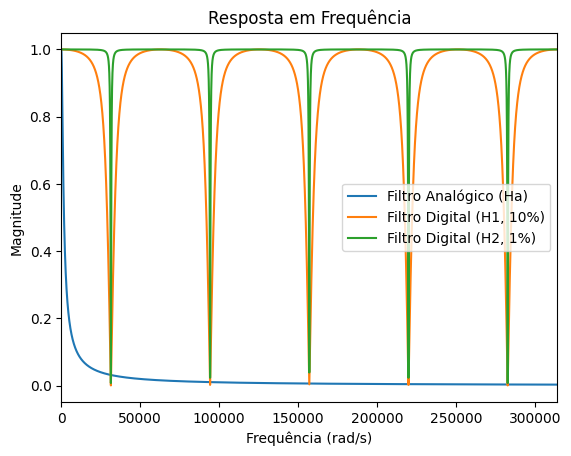

Taxa de amostragem T1 (10%): 0.01
Taxa de amostragem T2 (1%): 0.1


In [12]:


# Frequ√™ncia de corte do filtro anal√≥gico
wc = 1e3

# Crit√©rio de aproxima√ß√£o (10%)
eps1 = 0.1

# Taxa de amostragem para a aproxima√ß√£o digital (10%)
T1 = 1 / (wc * eps1)

# Frequ√™ncias para o plot
w = np.linspace(0, 1e5 * np.pi, 10000)

# Resposta em frequ√™ncia do filtro anal√≥gico
Ha1 = 1 / (1 + 1j * w / wc)

# Filtro digital com crit√©rio de aproxima√ß√£o de 10%
b1, a1 = signal.bilinear([1], [1 / wc, 1], fs=1 / T1)

# Resposta em frequ√™ncia do filtro digital com crit√©rio de aproxima√ß√£o de 10%
w_d1, H1 = signal.freqz(b1, a1, worN=w)

# Plot das respostas em frequ√™ncia com crit√©rio de aproxima√ß√£o de 10%
plt.plot(w, abs(Ha1), label='Filtro Anal√≥gico (Ha)')
plt.plot(w, abs(H1), label='Filtro Digital (H1, 10%)')

# Crit√©rio de aproxima√ß√£o (1%)
eps2 = 0.01

# Taxa de amostragem para a aproxima√ß√£o digital (1%)
T2 = 1 / (wc * eps2)

# Filtro digital com crit√©rio de aproxima√ß√£o de 1%
b2, a2 = signal.bilinear([1], [1 / wc, 1], fs=1 / T2)

# Resposta em frequ√™ncia do filtro digital com crit√©rio de aproxima√ß√£o de 1%
w_d2, H2 = signal.freqz(b2, a2, worN=w)

# Plot das respostas em frequ√™ncia com crit√©rio de aproxima√ß√£o de 1%
plt.plot(w, abs(H2), label='Filtro Digital (H2, 1%)')

plt.title('Resposta em Frequ√™ncia')
plt.xlabel('Frequ√™ncia (rad/s)')
plt.ylabel('Magnitude')
plt.xlim(0, 1e5 * np.pi)  # Limitando o eixo x at√© ùúî = 10^5 * pi
plt.legend()
plt.show()

# Print das taxas de amostragem T1 e T2
print('Taxa de amostragem T1 (10%):', T1)
print('Taxa de amostragem T2 (1%):', T2)


## Quest√£o 3d (2 pontos)

Considere o sinal:
$$ x\left(t\right) = e^{- \lambda t} u\left(t\right)$$

com

$$\lambda = 500 $$

Calcule a resposta te√≥rica do filtro anal√≥gico, y(t), bem como a resposta do filtro digital H1(z) ao sinal amostrado com taxa T1 (x1[n]) e a resposta do filtro digital H2(z) ao sinal amostrado com taxa T2 (x2[n]). **Plote**, na mesma escala, o sinal y(t) e as aproxima√ß√µes y1[n] e y2[n]. 

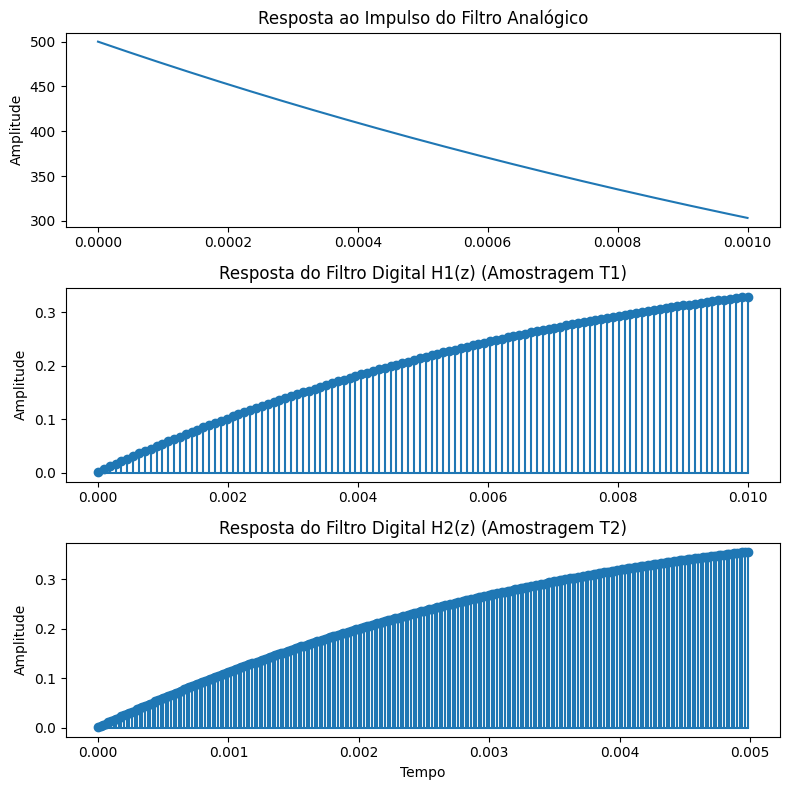

In [13]:

# Par√¢metros do sinal e dos filtros
lambda_val = 500
T1 = 1e-5
T2 = 5e-6  # Valor ajustado para evitar divis√£o por zero

# Fun√ß√£o de transfer√™ncia do filtro anal√≥gico
def transfer_function_analog(s):
    return 1 / (1 + s)

# Fun√ß√£o de transfer√™ncia do filtro digital H1(z)
b1, a1 = signal.bilinear([1], [1 / lambda_val, 1], fs=1 / T1)

# Fun√ß√£o de transfer√™ncia do filtro digital H2(z)
b2, a2 = signal.bilinear([1], [1 / lambda_val, 1], fs=1 / T2)

# Resposta ao impulso do filtro anal√≥gico
t = np.linspace(0, 1e-3, 1000)  # Intervalo de tempo para a resposta ao impulso
h_analog = signal.impulse(([1], [1 / lambda_val, 1]), T=t)[1]

# Sinal de entrada x(t)
x = np.exp(-lambda_val * t) * (t >= 0)

# Sinais discretizados x1[n] e x2[n]
n1 = np.arange(0, len(x), int(T1 / t[1]))
n2 = np.arange(0, len(x), int(T2 / t[1]))
x1 = x[n1]
x2 = x[n2]

# Respostas dos filtros digitais
y1 = signal.lfilter(b1, a1, x1)
y2 = signal.lfilter(b2, a2, x2)

# Plot dos resultados
plt.figure(figsize=(8, 8))
plt.subplot(311)
plt.plot(t, h_analog)
plt.ylabel('Amplitude')
plt.title('Resposta ao Impulso do Filtro Anal√≥gico')

plt.subplot(312)
plt.stem(n1 * T1, y1, linefmt='C0', markerfmt='C0o', basefmt='C0')
plt.ylabel('Amplitude')
plt.title('Resposta do Filtro Digital H1(z) (Amostragem T1)')

plt.subplot(313)
plt.stem(n2 * T2, y2, linefmt='C0', markerfmt='C0o', basefmt='C0')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta do Filtro Digital H2(z) (Amostragem T2)')

plt.tight_layout()
plt.show()
